# Fundamentals of fMRI data analysis 
## Functional connectivity


In this assignment, your task is to run simple seed-to-voxel functional connectivity analysis of fMRI data in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 12-02-2021

-------------------

## Task 1



Repeat seed-to-voxel analysis from our last excercise with your favourite brain region as a *seed*!

### Fill some details about the selected seed region:

Name of the selected brain area: Fusiform Face Area (FFA)

MNI coordinates of selected brain area: x = -38,
                                        y = -58,
                                        z = -14

Source (website, journal article, etc.): 

*articles saved in folder "articles and sources"*

1. [Functional Organization of Face Processing in the Human Superior Temporal Sulcus: A 7T High-Resolution fMRI Study](https://www.researchgate.net/publication/320444099_Functional_Organization_of_Face_Processing_in_the_Human_Superior_Temporal_Sulcus_A_7T_High-Resolution_fMRI_Study)
2. [Фмрт-исследование функциональных связей головного мозга в задаче категоризации эмоциональных и нейтральных лиц](https://elibrary.ru/item.asp?id=32148532)

In [109]:
import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from scipy import stats
import matplotlib.pyplot as plt

In [110]:
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]

print(func_filename)
print(confounds_filename)

C:\Users\DOM/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
C:\Users\DOM/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv


In [114]:
# creating a seed
ffa_coords = [(-38, -58, -14)]
seed_masker = input_data.NiftiSpheresMasker(
    ffa_coords, radius=8,
    detrend=True, standardize=True)

In [115]:
seed_time_series = seed_masker.fit_transform(func_filename,
                                             confounds=[confounds_filename])
seed_time_series = np.squeeze(seed_time_series)

In [116]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=8,
    detrend=True, standardize=True,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_time_series = brain_masker.fit_transform(func_filename,
                                               confounds=confounds_filename)

In [117]:
print("Seed time series shape: (%s,)" % seed_time_series.shape)
print("Brain time series shape: (%s, %s)" % brain_time_series.shape)

Seed time series shape: (168,)
Brain time series shape: (168, 32504)


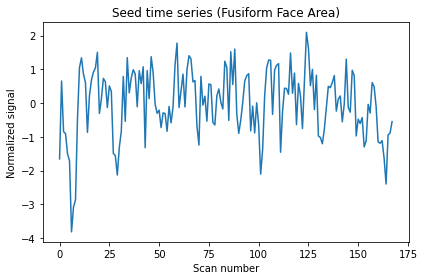

In [118]:
plt.plot(seed_time_series)
plt.title('Seed time series (Fusiform Face Area)')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

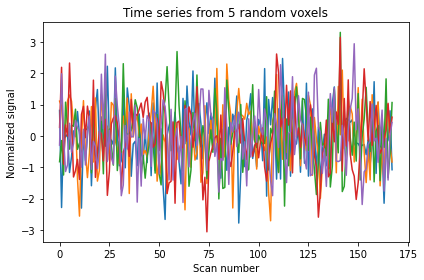

In [119]:
plt.plot(brain_time_series[:, [10, 45, 100, 5000, 10000]])
plt.title('Time series from 5 random voxels')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

In [120]:
seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0])

In [121]:
print("Seed-to-voxel correlation shape: (%s,)" %
      seed_to_voxel_correlations.shape)
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % 
      (seed_to_voxel_correlations.min(),
      seed_to_voxel_correlations.max()))

Seed-to-voxel correlation shape: (32504,)
Seed-to-voxel correlation: min = -0.479; max = 0.950


In [122]:
corr_map = np.zeros(brain_time_series.shape[1])

for i in range(brain_time_series.shape[1]):
    corr_map[i] = stats.pearsonr(seed_time_series, brain_time_series[:,i])[0]
    
corr_map

array([-0.14204926, -0.08638674,  0.2104889 , ...,  0.28768781,
       -0.22259418, -0.03193586])

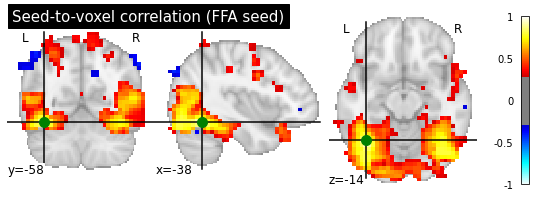

In [128]:
seed_to_voxel_correlations_img = brain_masker.inverse_transform(corr_map.T)

display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.3, vmax=1,
                                 cut_coords=ffa_coords[0],
                                 title="Seed-to-voxel correlation (FFA seed)")

display.add_markers(marker_coords=ffa_coords, marker_color='g',
                    marker_size=100)

In [129]:
display.savefig('ffa_seed_correlation.pdf')

What brain areas are functionally connected with your seed region?

**Answer**: 

The superior temporal sulcus (STS) and occipital face area (OFA) are connected to the fusiform face area.